In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
import pathlib
from typing import Tuple

In [2]:
ls ~/data/2D_recovery_studies/increased_covmatrix

all_2D/        s_0.3/  s_0.7/   s_0.86/  s_0.94/  xyz_blowup/
higher_stats/  s_0.4/  s_0.8/   s_0.88/  s_0.96/  y_blowup/
s_0.1/         s_0.5/  s_0.82/  s_0.9/   s_0.98/  z_blowup/
s_0.2/         s_0.6/  s_0.84/  s_0.92/  s_1/


In [3]:
input_file_3D = (
    str(pathlib.Path.home())
    + '/data/2D_recovery_studies/increased_covmatrix/s_0.98/truthMatchedDaVinciLog.h5'
)

input_file_2D = (
    str(pathlib.Path.home())
    + '/data/2D_recovery_studies/increased_covmatrix/all_2D/s_0.98/truthMatchedDaVinciLog.h5'
)

In [4]:
save_plots = True

In [5]:
## Create plots directory, if missing
plots_dir = (str(pathlib.Path.home())
                  + '/vertex-reconstruction-studies/'
                  + 'plots/'
                  + 'studies_on_truth_matched_davinci_logs/'
                  + 'all_2D_vs_3D_algorithm_performance_comparison/'
)
pathlib.Path(plots_dir).mkdir(parents=True, exist_ok=True)

# Import data

In [6]:
df_events_3D = pd.read_hdf(input_file_3D, key='LHCbMC_Lb')
df_events_3D = df_events_3D.loc[df_events_3D['status'] == 'Converged', :]
df_events_3D

,Lb_ENDVERTEX_X,Lb_ENDVERTEX_Y,Lb_ENDVERTEX_Z,L_ENDVERTEX_X,L_ENDVERTEX_Y,L_ENDVERTEX_Z,Jpsi_ENDVERTEX_X,Jpsi_ENDVERTEX_Y,Jpsi_ENDVERTEX_Z,L_PX,...,pim_posMomCovMatrix_3_5,pim_posMomCovMatrix_3_6,pim_posMomCovMatrix_4_4,pim_posMomCovMatrix_4_5,pim_posMomCovMatrix_4_6,pim_posMomCovMatrix_5_5,pim_posMomCovMatrix_5_6,pim_posMomCovMatrix_6_6,match_index,mismatch_perc
0,1.674753,0.053259,0.004623,461.983261,-78.247981,6504.222043,1.6747,0.0532,0.0037,4601.051416,...,3142.56,3145.09,17.4188,-2.138120e+02,-2.140240e+02,73162.6,73220.9,73279.2,0,0.000030
1,0.880395,-0.130333,15.654301,209.545799,199.243538,4381.083975,0.8804,-0.1302,15.6547,745.277623,...,9031.32,9376.81,43.3318,3.264650e+01,3.425470e+01,31859.4,33076.1,34339.4,1,0.000035
2,0.893069,-0.210212,27.346294,84.953310,-116.199707,5557.096303,0.8930,-0.2103,27.3459,627.274341,...,-28860.80,-28879.30,787.3740,-2.837230e+04,-2.839180e+04,1099220.0,1099920.0,1100620.0,4,0.000041
4,0.636031,-0.090822,-65.799311,-207.686722,152.674077,7297.794399,0.6356,-0.0907,-65.7961,-1549.606044,...,-13094.40,-13105.40,201.6090,6.041500e+03,6.048110e+03,340592.0,340879.0,341166.0,11,0.000040
5,0.986496,-0.173897,54.366690,133.523208,3.904319,6612.102919,0.9868,-0.1738,54.3579,1604.194414,...,13094.50,13103.20,70.6920,1.017340e+03,1.018390e+03,346428.0,346658.0,346889.0,12,0.000034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202,1.029511,-0.230128,-20.454931,593.077632,193.184027,4914.675864,1.0296,-0.2306,-20.4526,1884.590988,...,-41636.00,-41883.40,1098.1200,2.055770e+04,2.068350e+04,415939.0,418403.0,420883.0,10376,0.000039
1203,1.101364,-0.737077,67.994382,363.661658,-55.080362,5695.448012,1.1019,-0.7389,67.9972,10606.205807,...,-4307.51,-4319.34,32.7535,-1.153530e+03,-1.156850e+03,56049.1,56201.2,56353.8,10377,0.000040
1207,1.101831,-0.738614,67.996588,380.401838,-66.608245,5851.400767,1.1019,-0.7389,67.9972,9191.521537,...,-4307.51,-4319.34,32.7535,-1.153530e+03,-1.156850e+03,56049.1,56201.2,56353.8,10378,20.640926
1210,1.101831,-0.738614,67.996588,380.401838,-66.608245,5851.400767,1.1019,-0.7389,67.9972,9191.521537,...,-12797.50,-12866.60,38.5827,-1.849800e+03,-1.859920e+03,112067.0,112672.0,113279.0,4793,23.093881


In [7]:
df_events_2D = pd.read_hdf(input_file_2D, key='LHCbMC_Lb')
df_events_2D = df_events_2D.loc[df_events_2D['status'] == 'Converged2D', :]
df_events_2D

,Lb_ENDVERTEX_X,Lb_ENDVERTEX_Y,Lb_ENDVERTEX_Z,L_ENDVERTEX_X,L_ENDVERTEX_Y,L_ENDVERTEX_Z,Jpsi_ENDVERTEX_X,Jpsi_ENDVERTEX_Y,Jpsi_ENDVERTEX_Z,L_PX,...,pim_posMomCovMatrix_3_5,pim_posMomCovMatrix_3_6,pim_posMomCovMatrix_4_4,pim_posMomCovMatrix_4_5,pim_posMomCovMatrix_4_6,pim_posMomCovMatrix_5_5,pim_posMomCovMatrix_5_6,pim_posMomCovMatrix_6_6,match_index,mismatch_perc
0,0.880396,-0.130332,15.654310,209.815708,198.703981,4375.034351,0.8804,-0.1302,15.6547,739.381573,...,9031.32,9376.81,43.3318,3.264650e+01,3.425470e+01,31859.4,33076.1,34339.4,1,0.000035
1,0.893067,-0.210211,27.346294,84.950689,-116.173875,5555.983100,0.8930,-0.2103,27.3459,626.876901,...,-28860.80,-28879.30,787.3740,-2.837230e+04,-2.839180e+04,1099220.0,1099920.0,1100620.0,4,0.000041
2,0.605714,-0.203049,22.148035,-202.498747,18.725639,3762.349599,0.6057,-0.2032,22.1485,-2766.567392,...,26939.30,26960.10,90.1864,5.198510e+03,5.202890e+03,669476.0,669988.0,670499.0,9,0.000034
3,0.986467,-0.173922,54.367574,134.051222,3.959282,6635.673166,0.9868,-0.1738,54.3579,1624.939057,...,13094.50,13103.20,70.6920,1.017340e+03,1.018390e+03,346428.0,346658.0,346889.0,12,0.000034
4,0.964616,0.025096,-0.666939,-134.013677,189.405439,3150.833245,0.9644,0.0248,-0.6709,3318.442953,...,191458.00,206428.00,4514.5800,4.638570e+04,5.001970e+04,487545.0,525657.0,566752.0,14,0.000043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1.101174,-0.736725,67.994588,363.992040,-55.346097,5708.701097,1.1019,-0.7389,67.9972,11287.937715,...,-4307.51,-4319.34,32.7535,-1.153530e+03,-1.156850e+03,56049.1,56201.2,56353.8,10377,0.000040
1050,1.101174,-0.736725,67.994588,363.992040,-55.346097,5708.701097,1.1019,-0.7389,67.9972,11287.937715,...,-22402.00,-22457.50,62.7731,-3.803330e+03,-3.812820e+03,252021.0,252644.0,253269.0,10383,0.000044
1053,1.101831,-0.738614,67.996588,380.401838,-66.608245,5851.400767,1.1019,-0.7389,67.9972,9191.521537,...,-4307.51,-4319.34,32.7535,-1.153530e+03,-1.156850e+03,56049.1,56201.2,56353.8,10378,20.640926
1057,0.759248,-0.783211,68.533942,-19.972330,-456.629755,6368.334210,0.7591,-0.7829,68.5325,-4356.916936,...,2821250.00,2826850.00,525617.0000,-8.721530e+06,-8.738940e+06,145133000.0,145421000.0,145709000.0,10386,0.000040


# Merge DataFrames
First, how many of the events do these two dataframes have in common? To answer, we perform something similar to the already developed truth match.

In [8]:
merge_branches = [
    'p_refPoint_X',
    'p_refPoint_Y',
    'p_refPoint_Z',
    'p_momentum_X',
    'p_momentum_Y',
    'p_momentum_Z',
    'p_posMomCovMatrix_0_0',
    'p_posMomCovMatrix_0_1',
    'p_posMomCovMatrix_0_3',
    'p_posMomCovMatrix_0_4',
    'p_posMomCovMatrix_0_5',
    'p_posMomCovMatrix_1_1',
    'p_posMomCovMatrix_1_3',
    'p_posMomCovMatrix_1_4',
    'p_posMomCovMatrix_1_5',
    'p_posMomCovMatrix_3_3',
    'p_posMomCovMatrix_3_4',
    'p_posMomCovMatrix_3_5',
    'p_posMomCovMatrix_4_4',
    'p_posMomCovMatrix_4_5',
    'p_posMomCovMatrix_5_5',
    'pim_refPoint_X',
    'pim_refPoint_Y',
    'pim_refPoint_Z',
    'pim_momentum_X',
    'pim_momentum_Y',
    'pim_momentum_Z',
    'pim_posMomCovMatrix_0_0',
    'pim_posMomCovMatrix_0_1',
    'pim_posMomCovMatrix_0_3',
    'pim_posMomCovMatrix_0_4',
    'pim_posMomCovMatrix_0_5',
    'pim_posMomCovMatrix_1_1',
    'pim_posMomCovMatrix_1_3',
    'pim_posMomCovMatrix_1_4',
    'pim_posMomCovMatrix_1_5',
    'pim_posMomCovMatrix_3_3',
    'pim_posMomCovMatrix_3_4',
    'pim_posMomCovMatrix_3_5',
    'pim_posMomCovMatrix_4_4',
    'pim_posMomCovMatrix_4_5',
    'pim_posMomCovMatrix_5_5',
    'MCTRUTH_Lb_ENDVERTEX_X',
    'MCTRUTH_Lb_ENDVERTEX_Y',
    'MCTRUTH_Lb_ENDVERTEX_Z',
    'MCTRUTH_L_ENDVERTEX_X',
    'MCTRUTH_L_ENDVERTEX_Y',
    'MCTRUTH_L_ENDVERTEX_Z',
    'MCTRUTH_p_PX',
    'MCTRUTH_p_PY',
    'MCTRUTH_p_PZ',
    'MCTRUTH_pim_PX',
    'MCTRUTH_pim_PY',
    'MCTRUTH_pim_PZ',
    'MCTRUTH_mum_PX',
    'MCTRUTH_mum_PY',
    'MCTRUTH_mum_PZ',
    'MCTRUTH_mup_PX',
    'MCTRUTH_mup_PY',
    'MCTRUTH_mup_PZ',
    'MCTRUTH_Lb_ID',
    'MCTRUTH_L_ID',
    'MCTRUTH_Lb_Reconstructible',
    'MCTRUTH_L_Reconstructible',
    'MCTRUTH_p_Reconstructible',
    'MCTRUTH_pim_Reconstructible',
    'MCTRUTH_Jpsi_Reconstructible',
    'MCTRUTH_mup_Reconstructible',
    'MCTRUTH_mum_Reconstructible',
    'MCTRUTH_Lb_Reconstructed',
    'MCTRUTH_L_Reconstructed',
    'MCTRUTH_p_Reconstructed',
    'MCTRUTH_pim_Reconstructed',
    'MCTRUTH_Jpsi_Reconstructed',
    'MCTRUTH_mup_Reconstructed',
    'MCTRUTH_mum_Reconstructed'
]

In [9]:
df_events = df_events_3D.merge(df_events_2D, on=merge_branches, how='outer', suffixes=['_3D', '_2D'])
df_events.loc[df_events['Lb_ENDVERTEX_X_3D'].isnull(), 'algorithm'] = '2D'
df_events.loc[df_events['Lb_ENDVERTEX_X_2D'].isnull(), 'algorithm'] = '3D'
df_events.loc[~df_events['Lb_ENDVERTEX_X_2D'].isnull() & ~df_events['Lb_ENDVERTEX_X_3D'].isnull(), 'algorithm'] = 'both'

This helps us to check if the merge has missed some events.

In [10]:
df_tmp_2D = df_events.loc[df_events['algorithm'] == '2D']
df_tmp_2D.reset_index(inplace=True, drop=True)

df_tmp_3D = df_events.loc[df_events['algorithm'] == '3D']
df_tmp_3D.reset_index(inplace=True, drop=True)

## List of indices for df_tmp_3D. These are the indices of events to match
indices_3D = list(range(len(df_tmp_3D)))
## List of indices for df_tmp_3D. These are the indices of unpaired events
indices_2D = list(range(len(df_tmp_2D)))

for index_3D in indices_3D:
    ## Get the event
    evt_to_match = df_tmp_3D.iloc[index_3D]
    ## Compute the total sum of absolute discrepancies between the two DF on merge_columns
    ## Use relative discrepancies: otherwise a small discrepancy on a big value (say,
    ## momenta components in position-momentum covariance matrices) may offset many larger
    ## discrepancies on smaller values.
    discrepancies_3D_2D = abs(
        (evt_to_match[merge_branches] - df_tmp_2D[merge_branches].iloc[indices_2D])/evt_to_match[merge_branches]
    ).sum(axis=1)
    ## Get minimum discrepancy and corresponding index. We assume that's the matching event
    discrepancy = discrepancies_3D_2D.min()
    discrepancy_idx = discrepancies_3D_2D.idxmin()
    if discrepancy < 1:
        print(index_3D, '\t', discrepancy_idx, '\t', discrepancy)
        
del(df_tmp_2D)
del(df_tmp_3D)

Doesn't look like it.

In [11]:
df_events

,Lb_ENDVERTEX_X_3D,Lb_ENDVERTEX_Y_3D,Lb_ENDVERTEX_Z_3D,L_ENDVERTEX_X_3D,L_ENDVERTEX_Y_3D,L_ENDVERTEX_Z_3D,Jpsi_ENDVERTEX_X_3D,Jpsi_ENDVERTEX_Y_3D,Jpsi_ENDVERTEX_Z_3D,L_PX_3D,...,pim_posMomCovMatrix_2_4_2D,pim_posMomCovMatrix_2_5_2D,pim_posMomCovMatrix_2_6_2D,pim_posMomCovMatrix_3_6_2D,pim_posMomCovMatrix_4_6_2D,pim_posMomCovMatrix_5_6_2D,pim_posMomCovMatrix_6_6_2D,match_index_2D,mismatch_perc_2D,algorithm
0,1.674753,0.053259,0.004623,461.983261,-78.247981,6504.222043,1.6747,0.0532,0.0037,4601.051416,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3D
1,0.880395,-0.130333,15.654301,209.545799,199.243538,4381.083975,0.8804,-0.1302,15.6547,745.277623,...,0.0,0.0,0.0,9376.81,34.2547,33076.1,34339.4,1.0,0.000035,both
2,0.893069,-0.210212,27.346294,84.953310,-116.199707,5557.096303,0.8930,-0.2103,27.3459,627.274341,...,0.0,0.0,0.0,-28879.30,-28391.8000,1099920.0,1100620.0,4.0,0.000041,both
3,0.636031,-0.090822,-65.799311,-207.686722,152.674077,7297.794399,0.6356,-0.0907,-65.7961,-1549.606044,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3D
4,0.986496,-0.173897,54.366690,133.523208,3.904319,6612.102919,0.9868,-0.1738,54.3579,1604.194414,...,0.0,0.0,0.0,13103.20,1018.3900,346658.0,346889.0,12.0,0.000034,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,-21712.60,-3224.3900,47476.2,52240.6,10177.0,0.000033,2D
1194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,-70612.80,3235.5000,549749.0,554228.0,10320.0,0.000042,2D
1195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,58167.30,2859.9100,320373.0,325553.0,10337.0,0.000036,2D
1196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,-22457.50,-3812.8200,252644.0,253269.0,10383.0,0.000044,2D


# Analysis proper

In [12]:
cond_3D = df_events['algorithm'] == '3D'
cond_2D = df_events['algorithm'] == '2D'
cond_both = df_events['algorithm'] == 'both'

## Number of events reconstructed by each algorithm

In [13]:
print("Fraction of events reconstructed with both algorithms:", "{:.2%}".format(sum(df_events['algorithm'] == 'both')/len(df_events)))
print("Fraction of events reconstructed only with 3D algorithm:", "{:.2%}".format(sum(df_events['algorithm'] == '3D')/len(df_events)))
print("Fraction of events reconstructed only with 2D algorithm:", "{:.2%}".format(sum(df_events['algorithm'] == '2D')/len(df_events)))

Fraction of events reconstructed with both algorithms: 73.79%
Fraction of events reconstructed only with 3D algorithm: 12.94%
Fraction of events reconstructed only with 2D algorithm: 13.27%


## $\Lambda^0$ decay vertex bias

In [14]:
color_3D = 'tab:blue'
color_2D = 'tab:orange'

In [15]:
def plot_2D_vs_3D_histograms(
    series_3D: pd.Series,
    series_2D: pd.Series,
    axis_label: str,
    plot_title: str,
    file_name: str,
    binning: int,
    boundaries: Tuple[float],
    log_scale: bool = False,
    scientific_notation: bool = False,
    normalized: bool = True
):
    ## 3D-converged events
    plt.hist(
        series_3D,
        bins=binning,
        range=boundaries,
        label="3D algorithm",
        histtype='stepfilled',
        edgecolor=color_3D,
        color=mcolors.to_rgba(color_3D, alpha=0.05),
        density=normalized
    )
    
    ## Failed
    plt.hist(
        series_2D,
        bins=binning,
        range=boundaries,
        label="2D algorithm",
        histtype='stepfilled',
        edgecolor=color_2D,
        color=mcolors.to_rgba(color_2D, alpha=0.05),
        density=normalized
    )
    
    plt.grid()
    plt.xlabel(axis_label)
    plt.title(plot_title)
    
    if log_scale:
        plt.yscale('log')

    if normalized:
        plt.ylabel("Probability density")
    else:
        plt.ylabel("Events")
    
    plt.legend()
    
    if scientific_notation:
        plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    
    if save_plots:
        plt.savefig(plots_dir + file_name + '.pdf', bbox_inches='tight')
    
    plt.show()

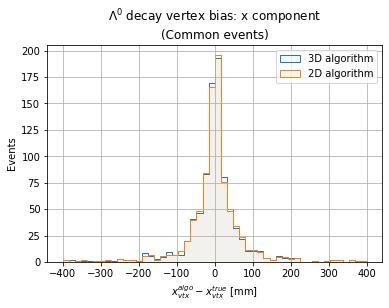

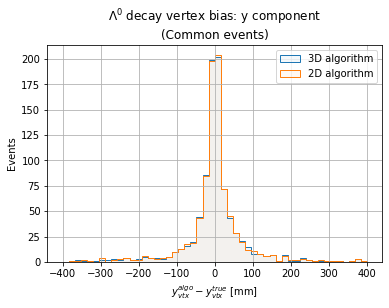

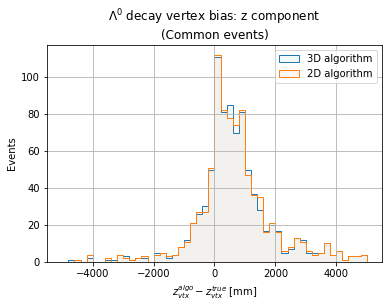

In [16]:
bias_boundary_dictionary = {
    'x': (-400,400),
    'y': (-400,400),
    'z': (-5000,5000),
}

for comp in ['x', 'y', 'z']:
    fitted_feature = 'L_ENDVERTEX_' + comp.upper()
    true_feature = 'MCTRUTH_L_ENDVERTEX_' + comp.upper()

    plot_args = {
        'axis_label': '$' + comp + '^{algo}_{vtx} - ' + comp + '^{true}_{vtx}$ [mm]',
        'plot_title': '$\Lambda^0$ decay vertex bias: ' + comp + " component" + '\n(Common events)',
        'file_name': 'Lambda_endvertex_' + comp + '_bias_common',
        'binning': 50,
        'boundaries': bias_boundary_dictionary[comp],
        'log_scale': False,
        'scientific_notation': False,
        'normalized': False
    }

    plot_2D_vs_3D_histograms(
        (df_events['L_ENDVERTEX_' + comp.upper() + '_3D'] - df_events['MCTRUTH_L_ENDVERTEX_' + comp.upper()]).loc[cond_both],
        (df_events['L_ENDVERTEX_' + comp.upper() + '_2D'] - df_events['MCTRUTH_L_ENDVERTEX_' + comp.upper()]).loc[cond_both],
        **plot_args)

Behaviour with events reconstructed by both is basically overlapping. However...

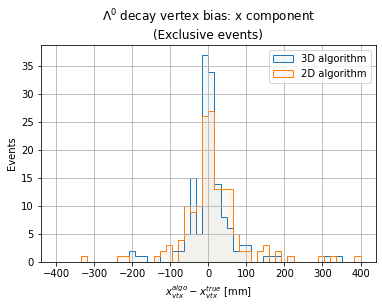

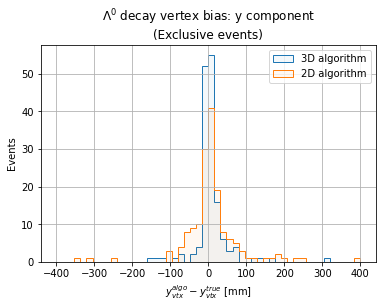

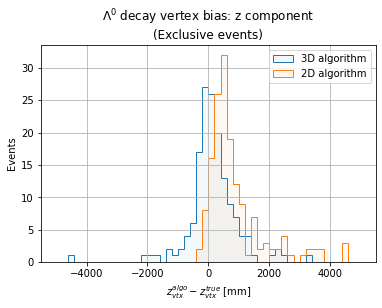

In [17]:
bias_boundary_dictionary = {
    'x': (-400,400),
    'y': (-400,400),
    'z': (-5000,5000),
}

for comp in ['x', 'y', 'z']:
    plot_args = {
        'axis_label': '$' + comp + '^{algo}_{vtx} - ' + comp + '^{true}_{vtx}$ [mm]',
        'plot_title': '$\Lambda^0$ decay vertex bias: ' + comp + " component" + '\n(Exclusive events)',
        'file_name': 'Lambda_endvertex_' + comp + '_bias_exclusive',
        'binning': 50,
        'boundaries': bias_boundary_dictionary[comp],
        'log_scale': False,
        'scientific_notation': False,
        'normalized': False
    }

    plot_2D_vs_3D_histograms(
        (df_events['L_ENDVERTEX_' + comp.upper() + '_3D'] - df_events['MCTRUTH_L_ENDVERTEX_' + comp.upper()]).loc[cond_3D],
        (df_events['L_ENDVERTEX_' + comp.upper() + '_2D'] - df_events['MCTRUTH_L_ENDVERTEX_' + comp.upper()]).loc[cond_2D],
        **plot_args)

Events only reconstructed by the 2D algorithm have an intrinsic bias, whereas those the 3D algo reconstructs are actually the best ones yet. Ergo it's not the fault of the algorithm, it's the fault of the events!

## $\tilde\chi^2$

### Common events

In [18]:
print("3D:\t", df_events.loc[cond_both, 'L_VFASPF_CHI2_VDOF_3D'].mean())
print("2D:\t", df_events.loc[cond_both, 'L_VFASPF_CHI2_VDOF_2D'].mean())

3D:	 3145.4842162567647
2D:	 3072.310864818


In [19]:
print("3D:\t", df_events.loc[cond_both, 'L_VFASPF_CHI2_VDOF_3D'].median())
print("2D:\t", df_events.loc[cond_both, 'L_VFASPF_CHI2_VDOF_2D'].median())

3D:	 1.0665878586983237
2D:	 1.0970709360612996


In [20]:
print("3D:\t", df_events.loc[cond_both, 'L_VFASPF_CHI2_VDOF_3D'].std())
print("2D:\t", df_events.loc[cond_both, 'L_VFASPF_CHI2_VDOF_2D'].std())

3D:	 69025.57933869818
2D:	 67325.65786172987


### Exclusive events

In [21]:
print("3D:\t", df_events.loc[cond_3D, 'L_VFASPF_CHI2_VDOF_3D'].mean())
print("2D:\t", df_events.loc[cond_2D, 'L_VFASPF_CHI2_VDOF_2D'].mean())

3D:	 30.56417652342906
2D:	 2596.5732970007757


In [22]:
print("3D:\t", df_events.loc[cond_3D, 'L_VFASPF_CHI2_VDOF_3D'].median())
print("2D:\t", df_events.loc[cond_2D, 'L_VFASPF_CHI2_VDOF_2D'].median())

3D:	 0.7410567636205572
2D:	 5.341186314999409


In [23]:
print("3D:\t", df_events.loc[cond_3D, 'L_VFASPF_CHI2_VDOF_3D'].std())
print("2D:\t", df_events.loc[cond_2D, 'L_VFASPF_CHI2_VDOF_2D'].std())

3D:	 179.98506109213935
2D:	 23970.046469254725


## Momentum bias

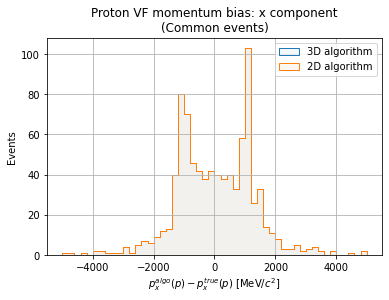

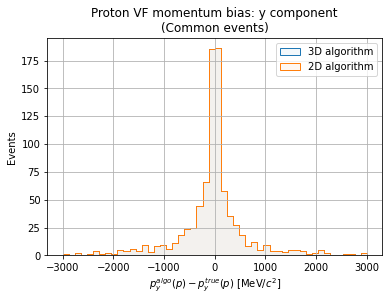

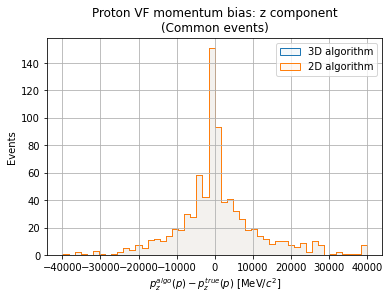

In [24]:
bias_boundary_dictionary = {
    'x': (-5000,5000),
    'y': (-3000,3000),
    'z': (-40000,40000),
}

for comp in ['x', 'y', 'z']:
    plot_args = {
        'axis_label': '$p_' + comp + '^{algo}(p) - p_' + comp + '^{true}(p)$ [MeV/$c^2$]',
        'plot_title': 'Proton VF momentum bias: ' + comp + " component" + '\n(Common events)',
        'file_name': 'proton_p' + comp + '_bias_common',
        'binning': 50,
        'boundaries': bias_boundary_dictionary[comp],
        'log_scale': False,
        'scientific_notation': False,
        'normalized': False
    }

    plot_2D_vs_3D_histograms(
        (df_events['p_P' + comp.upper() + '_3D'] - df_events['MCTRUTH_p_P' + comp.upper()]).loc[cond_both],
        (df_events['p_P' + comp.upper() + '_2D'] - df_events['MCTRUTH_p_P' + comp.upper()]).loc[cond_both],
        **plot_args)

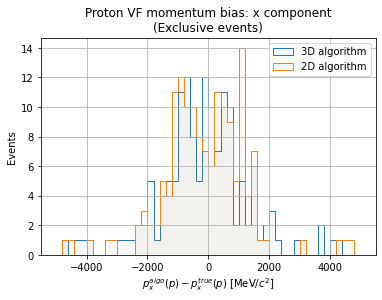

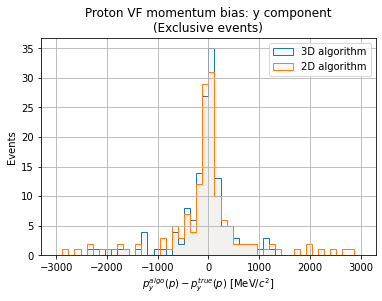

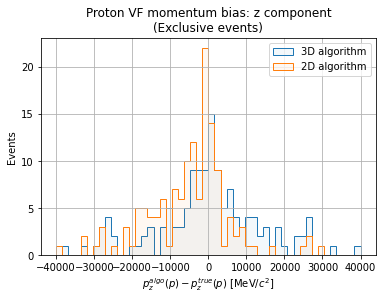

In [25]:
bias_boundary_dictionary = {
    'x': (-5000,5000),
    'y': (-3000,3000),
    'z': (-40000,40000),
}

for comp in ['x', 'y', 'z']:
    plot_args = {
        'axis_label': '$p_' + comp + '^{algo}(p) - p_' + comp + '^{true}(p)$ [MeV/$c^2$]',
        'plot_title': 'Proton VF momentum bias: ' + comp + " component" + '\n(Exclusive events)',
        'file_name': 'proton_p' + comp + '_bias_exclusive',
        'binning': 50,
        'boundaries': bias_boundary_dictionary[comp],
        'log_scale': False,
        'scientific_notation': False,
        'normalized': False
    }

    plot_2D_vs_3D_histograms(
        (df_events['p_P' + comp.upper() + '_3D'] - df_events['MCTRUTH_p_P' + comp.upper()]).loc[cond_3D],
        (df_events['p_P' + comp.upper() + '_2D'] - df_events['MCTRUTH_p_P' + comp.upper()]).loc[cond_2D],
        **plot_args)